<a href="https://colab.research.google.com/github/mhodierne1402/data-science-ml-portfolio/blob/main/image-caption-generator/Image_Caption_Generator_Stage_1A_Baseline_CNN_RNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Caption Generator Project**
### **STAGE 1A: Baseline CNN-RNN Model**

Mark Hodierne, January 2023.

---

**Status Update: 22 January 2023**

My baseline CNN-RNN model is complete.  
Training has been optimized and BLEU scores generated to assess the performance of the image caption generator.
Next steps: finalize reporting of performance metrics, complete documentation, then start to work on testing ways to optimize the model.

1. My baseline CNN-RNN model is complete.
1. Training has been optimized and BLEU scores generated to assess the performance of the image caption generator.
1.  Next steps: finalize reporting of performance metrics, complete documentation, then start to work on testing ways to optimize the model.

---





### **About this Project**

The goal of this project is to develop an AI system capable of automatically generating detailed textual captions that describe the content of images. Specifically, deep learning models using computer vision and natural language processing techniques will be trained on datasets of images paired with human-written captions.

The core problem being solved is enabling machines to see images and translate the visual concepts and scene elements into coherent natural language descriptions, much as a human would summarize for someone who is visually impaired.

Three main architectures will be explored in turn:
+ STAGE 1: A convolutional neural network plus recurrent neural network architecture
+ STAGE 2: An attention-based mechanism which improves relevancy through visual guidance, and
+ STAGE 3: Transformer models designed for parallelized computation and enhanced contextual modeling through self-attention

### **STAGE 1 - Implementation using a CNN encoder and RNN decoder model**

In this project I will develop a model that generates text captions that accurately describe the content of images. I will use the Flickr8k Dataset for image captioning. This dataset consists of 8000 unique images and each image is described by five different sentences. By associating each image with multiple, independently produced sentences, the dataset captures some of the linguistic variety that can be used to describe the same image.

To perform an Image Captioning task, two deep learning models are combined into one. Firstly, a Convolutional Neural Network (CNN) is used as an encoder to extract the features of each image into a vector representation, so-called vector embeddings.

Building a CNN for this task from scratch would be an immense undertaking because of the time it would require to train the model. It takes a lot of computational resources and time to train a computer vision neural network model on a large dataset of images. This time and resources can be shortened by using pre-trained models. The technique of leveraging feature representation from a pre-trained model is called transfer learning.

There are a lot of pre-trained models available for this task, such as VGG-16, InceptionV3, and ResNet. I shall use the InceptionV3 model, which has the least number of training parameters in comparison to the others and also outperforms them.

Secondly, a Recurrent Neural Network (RNN) is used as a decoder to generate a caption for each image vector embedding passed from the CNN. Specifically, I shall implement a specific type of RNN decoder known as an LSTM (Long Short Term Memory), which is commonly used for text generation processes.

To encode our text sequence we will map every word to a 200-dimensional vector. For this will use a pre-trained Glove model. This mapping will be done in a separate layer after the input layer called the embedding layer.

To generate the caption we will be using two popular methods which are Greedy Search and Beam Search. These methods will help us in picking the best words to accurately define the image.


### **STAGE 1A — Building a Baseline CNN-RNN Model**

The work to develop the CNN-RNN Model will be completed in two steps. In Stage 1A, I will build a 'baseline' model that successfully carries out the task of generating captions for previously unseen images. The performance of this model will be measured, and these metrics will serve as the baseline against which optimization actions can be assessed.

The process for building the CNN-RNN model will be as follows:

#### **1. Setup:**

- Connect to Google Drive and Kaggle
- Load the Flickr8k dataset from Kaggle
- Load the Python libraries required for the project
- Set path names for saving/loading files on Google Drive

#### **2. Images:**

- Explore the Flickr8k images in the dataset
- Use InceptionV3’s pre-processing to transform the Flickr8k images to 299x299 images
- Store all the pre-processed images in an images dictionary indexed by image id
- Create train, validation and test datasets; each a subset of the images dictionary
- Remove the softmax layer from the InceptionV3 model as only feature vectors are required for each image
- Use InceptionV3 to generate feature vectors for all images in each of the train, validation and test dictionaries
- Save these encoded image datasets to disk for easy re-use

#### **3. Captions:**

- Explore the captions in the Flickr8k dataset
- Pre-process the captions to result in lowercase a-z text; add ‘startseq’ and ‘endseq’ to the beginning and end of each phrase
- Split the captions into train, validation and test datasets; each a dictionary with the same keys as the corresponding image dictionary; the captions for each image are stored as a list
- Create a single list of all captions and use to create a tokenizer
- Save the word index created by the tokenizer
- Import the GloVe 6B Model used to generate word embeddings
- Create an index of the GloVe model's 200 dimension word embeddings
- Create an embedding matrix that stores the 200 dimension word embedding for each of the words in the word index (the Flickr8k vocabulary)

#### **4. Model:**

- Create a Neural Network that takes the training set of image feature vectors and the training set of word embeddings as inputs
- Use the embedding matrix (the pre-trained GloVe vectors) to set the weights in the embedding layer of the model
- Compile the model using categorical crossentropy as the loss function, and the Adam optimization as the stochastic gradient descent method
- Create a data generator to enable the model to be trained in batches
- Fit the model using the generator function and specifying the number of training epochs
- Review the performance of the model by comparing loss and accuracy metrics for the training dataset and the validation dataset; identify optimum number of epochs for training

#### **5. Decoding:**

- Implement a Greedy Search algorithm that uses the highest probability next word generated by the model to build a caption one word at a time for images in the test dataset (previously unseen by the model)
- Implement a Beam Search algorithm and compare the  performance with Greedy Search

#### **6. Performance:**

- Examine the performance of the model on the test dataset
- Implement the BLEU Score to measure the quality of the model generated captions
- Provide options for improving the performance for the model and outline what will be tested in [STAGE 1B: Optimized CNN-RNN Model](https://github.com/mhodierne1402/data-science-ml-portfolio/blob/main/image-caption-generator/Image_Caption_Generator_Stage_1B_Optimized_CNN_RNN_Model.ipynb)


#### **7. Conclusions:**

Evaluate perplexity of LSTM on validation set during training.
To improve performance, hyperparameters to tune are: CNN architecture depth, LSTM hidden units, learning rates, dropout rates, batch size, and training epochs.
Can also try different optimization methods like RMSprop, Adam. And regularization techniques like early stopping, weight decay.

---

# **1. Setup**

- Connect to Google Drive and Kaggle
- Load the Flickr8k dataset from Kaggle
- Load the Python libraries required for the project
- Set path names for saving/loading files on Google Drive


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
# Enable dataset downloads from Kaggle

# Before running this code, complete these actions:
#     Click the Account tab in Kaggle and then scroll down to the API section
#     Click 'Create New API Token'
#     A file named “kaggle.json” will be download which contains the username and the API key
#     Upload the “kaggle.json” file to the Colab notebook

# Install the Kaggle library
! pip install kaggle

# Make a directory named “.kaggle”
! mkdir ~/.kaggle

# Copy the “kaggle.json” into this new directory
! cp kaggle.json ~/.kaggle/

# Allocate the required permission for this file
! chmod 600 ~/.kaggle/kaggle.json

# The colab notebook is now ready to download datasets from Kaggle

In [ ]:
# Load Flickr8k dataset from Kaggle
! kaggle datasets download adityajn105/flickr8k
! mkdir "/content/gdrive/My Drive/Colab Data/Flickr8k Dataset"
! unzip -q flickr8k.zip -d "/content/gdrive/My Drive/Colab Data/Flickr8k Dataset"


flickr8k.zip: Skipping, found more recently modified local copy (use --force to force download)
replace Images/1000268201_693b08cb0e.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
# Import all Python libraries needed for the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import os
import textwrap
import pickle
import random

from tqdm.notebook import tqdm # status bar showing task progress
from collections import Counter
from os import listdir

from sklearn.model_selection import train_test_split

from keras import Input, layers
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import LSTM, Embedding, Dense, Activation, Flatten, Reshape, Dropout,add
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.models import Model, load_model
from keras.utils import plot_model, to_categorical
from keras.callbacks import History, ModelCheckpoint, EarlyStopping

# Paths
image_path =        '/content/gdrive/My Drive/Colab Data/Flickr8k Dataset/Images/'
captions_path =     '/content/gdrive/My Drive/Colab Data/Flickr8k Dataset/'
working_directory = '/content/gdrive/My Drive/Colab Data/Working Directory/'
glove_path =        '/content/gdrive/My Drive/Colab Data/GloVe.6B Model/'


---

# **2. Images**

### **2.1 Pre-processing and train-validation-test splitting**

- Explore the Flickr8k images in the dataset
- Use InceptionV3’s pre-processing to transform the Flickr8k images to 299x299 images
- Store all the pre-processed images in an images dictionary indexed by image id
- Create train, validation and test datasets; each a subset of the images dictionary

In [ ]:
# Preview the captions data
data = pd.read_csv(f'{captions_path}captions.txt')
print(data.head(10))


                       image  \
0  1000268201_693b08cb0e.jpg   
1  1000268201_693b08cb0e.jpg   
2  1000268201_693b08cb0e.jpg   
3  1000268201_693b08cb0e.jpg   
4  1000268201_693b08cb0e.jpg   
5  1001773457_577c3a7d70.jpg   
6  1001773457_577c3a7d70.jpg   
7  1001773457_577c3a7d70.jpg   
8  1001773457_577c3a7d70.jpg   
9  1001773457_577c3a7d70.jpg   

                                             caption  
0  A child in a pink dress is climbing up a set o...  
1              A girl going into a wooden building .  
2   A little girl climbing into a wooden playhouse .  
3  A little girl climbing the stairs to her playh...  
4  A little girl in a pink dress going into a woo...  
5         A black dog and a spotted dog are fighting  
6  A black dog and a tri-colored dog playing with...  
7  A black dog and a white dog with brown spots a...  
8  Two dogs of different breeds looking at each o...  
9    Two dogs on pavement moving toward each other .  


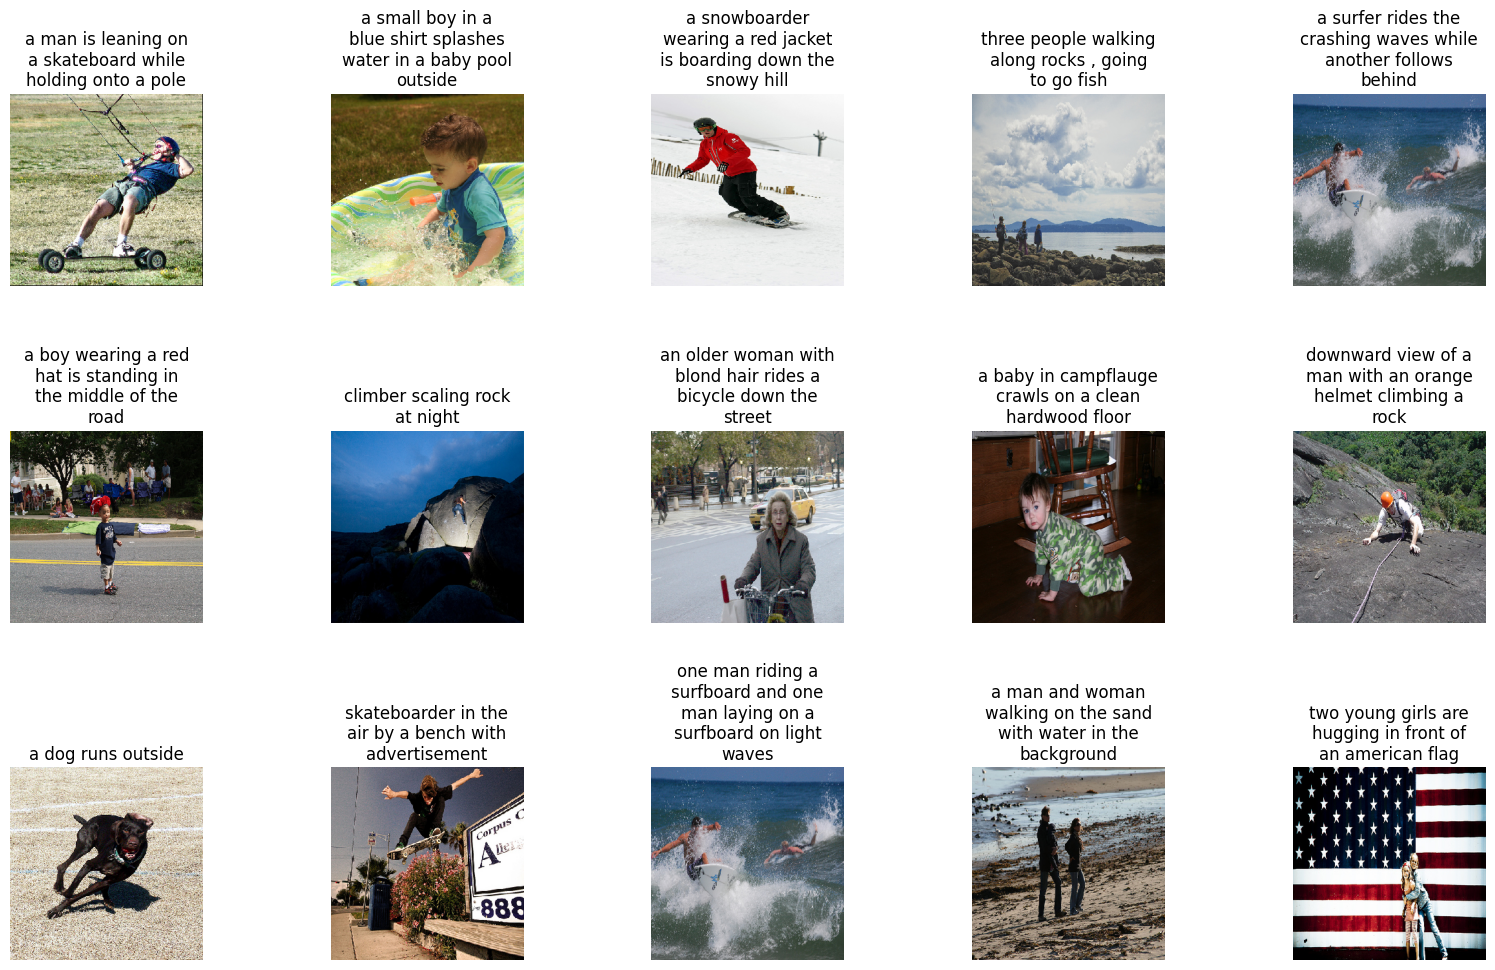

In [ ]:
def read_image(path, img_size=299):
    img = load_img(path, target_size=(img_size, img_size))
    img = img_to_array(img)/255.

    return img


def show_sample_images(df):
    df = df.reset_index(drop=True)
    plt.figure(figsize = (20 , 20))
    for i in range(len(df)):
        plt.subplot(5 , 5, i+1)
        plt.subplots_adjust(hspace=0.75)
        image = read_image(image_path + df.image[i])
        caption = df.caption[i]
        caption = caption.replace('.', '').strip().lower()
        text = textwrap.fill(caption, 20)
        plt.imshow(image)
        plt.title(text)
        plt.axis("off")

    return


# Preview the image data and one of the associated captions
show_sample_images(data.sample(15))


In [ ]:
def preprocess_image(path, img_size):
    img = load_img(path, target_size=(img_size, img_size))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)  # Added dimension to represent batch size
    img = preprocess_input(img)

    return img


def load_images(path, img_size=299):
    images = {}

    for name in tqdm(listdir(path)):
        filename = path + '/' + name
        images[name] = preprocess_image(filename, img_size)

        # temporary count logic to limit number of images processed
        #if len(images) > 100: break

    return images


# Load images
images = load_images(image_path)
print(f'Loaded Images: {len(images)}')


  0%|          | 0/8115 [00:00<?, ?it/s]

Loaded Images: 8115


The Flickr8k dataset has now been preprocessed for the purposes of caption generation in this project. Now, the images and associated captions need to be split into training, validation and test sets.

The Flickr8k dataset isn't an especially large one, so I have decided that the training set should be 80% of the total images, and the validation and test sets should both be 10% of the total images.

In [ ]:
image_ids = data['image'].unique().tolist()
total_num_images = len(image_ids)
print(f'Total number of images in dataset: {total_num_images}')

train_image_ids, test_image_ids = train_test_split(image_ids, test_size=0.2, random_state=21)
test_image_ids, val_image_ids = train_test_split(test_image_ids, test_size=0.5, random_state=33)
print(f'Number of images in train dataset: {len(train_image_ids)}')
print(f'Number of images in validation dataset: {len(val_image_ids)}')
print(f'Number of images in test dataset: {len(test_image_ids)}')

train_images = {key: images[key] for key in train_image_ids if key in images}
val_images = {key: images[key] for key in val_image_ids if key in images}
test_images = {key: images[key] for key in test_image_ids if key in images}

#assert len(train_image_ids) == len(train_images), 'Error creating training set of images'
#assert len(val_image_ids) == len(val_images),     'Error creating validation set of images'
#assert len(test_image_ids) == len(test_images),   'Error creating test set of images'
print(len(train_images))
print(len(val_images))
print(len(test_images))



Total number of images in dataset: 8091
Number of images in train dataset: 6472
Number of images in validation dataset: 810
Number of images in test dataset: 809
6472
810
809


---

### **2.2 Image feature extraction**

- Remove the softmax layer from the InceptionV3 model as only feature vectors are required for each image
- Use InceptionV3 to generate feature vectors for all images in each of the train, validation and test dictionaries
- Save these encoded image datasets to disk for easy re-use

The next step is to extract the features of the photos in each of the datasets using the pre-trained InceptionV3 model, and store the extracted features to files that can be later loaded and used for training the language model. This InceptionV3 model is provided directly in Keras.

Later, the feature extraction model and language model can be put back together for making predictions on new photos.

In [ ]:
model = InceptionV3(weights='imagenet')

# Remove the softmax layer from the model as we only need to extract a feature vector for an image
model_new = Model(model.input, model.layers[-2].output)

def encode(img):
    fea_vec = model_new.predict(img, verbose=0)
    fea_vec = np.reshape(fea_vec, fea_vec.shape[1])
    return fea_vec


encoded_train_images = {id: encode(img) for id, img in tqdm(train_images.items())}
encoded_val_images = {id: encode(img) for id, img in tqdm(val_images.items())}
encoded_test_images = {id: encode(img) for id, img in tqdm(test_images.items())}

# store images features in pickle
pickle.dump(encoded_train_images, open(f'{working_directory}encoded_train_images.pkl', 'wb'))
pickle.dump(encoded_val_images, open(f'{working_directory}encoded_val_images.pkl', 'wb'))
pickle.dump(encoded_test_images, open(f'{working_directory}encoded_test_images.pkl', 'wb'))



  0%|          | 0/6472 [00:00<?, ?it/s]

  0%|          | 0/810 [00:00<?, ?it/s]

  0%|          | 0/809 [00:00<?, ?it/s]

In [ ]:
# load images features from pickle
with open(f'{working_directory}encoded_train_images.pkl', 'rb') as f:
    encoded_train_images = pickle.load(f)
with open(f'{working_directory}encoded_val_images.pkl', 'rb') as f:
    encoded_val_images = pickle.load(f)
with open(f'{working_directory}encoded_test_images.pkl', 'rb') as f:
    encoded_test_images = pickle.load(f)



Scanning through the captions.txt file, I can see a number of actions that need to be taken to pre-process the text descriptions:
+ convert all text to lower case
+ remove punctuation e.g. ".,'?:;!-
+ remove tokens of one character e.g. ‘a’ and hanging ‘s’ characters
+ remove numbers
+ remove excess white space
+ add starting and ending tags to each description

Finally, I load all of the descriptions into a dictionary so they can be accessed using the image file id as the key.


---

# **3. Captions**

### **3.1 Pre-processing and train-validation-test splitting**

- Explore the captions in the Flickr8k dataset
- Pre-process the captions to result in lowercase a-z text; add ‘startseq’ and ‘endseq’ to the beginning and end of each phrase
- Split the captions into train, validation and test datasets; each a dictionary with the same keys as the corresponding image dictionary; the captions for each image are stored as a list

In [ ]:
def preprocess_text(caption):
    caption = caption.lower()                     # converts to lower case
    caption = re.sub(r'[^a-z\s]', ' ', caption)   # deletes any characters other than a-z and spaces
    caption = re.sub(r'\b\w\b', '', caption)      # remove tokens of one character
    caption = re.sub(r'^', 'startseq ', caption)  # adds a tag at the start of the caption
    caption = re.sub(r'$', ' endseq', caption)    # adds a tag at the end of the caption
    caption = re.sub(r'\s+', ' ', caption)        # deletes any excess space

    return caption


def test_preprocess_text():
    assert preprocess_text("Bat's Out OF Hell") == 'startseq bat out of hell endseq',           "preprocess_text test 1 failed"
    assert preprocess_text('. Bat    Out OF   a Hell%  ') == 'startseq bat out of hell endseq', "preprocess_text test 2 failed"
    assert preprocess_text('  Bat-Out OF-Hell  ') == 'startseq bat out of hell endseq',         "preprocess_text test 3 failed"
    return

test_preprocess_text()

data = pd.read_csv(f'{captions_path}captions.txt')
data.caption = data.caption.apply(preprocess_text)

captions, train_captions, val_captions, test_captions = {}, {}, {}, {}

for index, row in data.iterrows():
    if row.image not in captions:
        captions[row.image] = []
    captions[row.image].append(row.caption)

    if row.image in encoded_train_images:
        captions_dict = train_captions
    elif row.image in encoded_val_images:
        captions_dict = val_captions
    elif row.image in encoded_test_images:
        captions_dict = test_captions
    else:
        continue

    if row.image not in captions_dict:
        captions_dict[row.image] = []
    captions_dict[row.image].append(row.caption)


# Check results
print(f'Number of total captions: {len(captions)}')
print(f'Number of training set captions: {len(train_captions)}')
print(f'Number of validation set captions: {len(val_captions)}')
print(f'Number of test set captions: {len(test_captions)}\n')


Number of total captions: 8091
Number of training set captions: 6472
Number of validation set captions: 810
Number of test set captions: 809



Next, I need to create a tokenizer using the corpus so that each caption can be 'tokenized', where each word is integer encoded and a caption becomes a list of integers.

There are 5 captions for each of the 8427 images, and the longest caption consists of 35 words (including the 'startseq' and 'endseq' tokens).

---

### **3.2 Tokenization**

- Create a single list of all captions and use to create a tokenizer
- Save the word index created by the tokenizer


In [ ]:
# Create a list of all captions
all_captions = [caption for captions_list in captions.values() for caption in captions_list]
print(f'Total number of captions: {len(all_captions)}')

# Create the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_captions)

# Mapping of words to index position in the vocabulary
word_index = tokenizer.word_index
print(f"Testing the word mapping: 'water' can be found at index position {word_index['water']}")

vocab_size = len(word_index) + 1  # Add 1 for the zero-padding
print(f'Vocabulary size: {vocab_size}')

# Find the longest caption
max_length = max(len(caption.split()) for caption in all_captions)
print(f'Max length of caption: {max_length}')


Total number of captions: 40455
Testing the word mapping: 'water' can be found at index position 23
Vocabulary size: 8427
Max length of caption: 35


Once the words are tokenized I can generate word vectors. Word vectors that represent similar words will be clustered together when mapped to a vector space; word vectors that represent different words will appear more separated.

Similarly to how I used a pre-trained model to generate the image embeddings, the word vectors, or embeddings, can be generated using a pre-trained model. I am going to use a model called GloVe that leverages global statistics of word co-occurrence across the entire corpus that was used for training.

An alternative model like Word2Vec generates embeddings based on the local context of words in a sentence, and consequently GloVe has a deeper understanding of word context. GloVe also has fewer hyperparameters than Word2Vec.

GloVe will be used to translate each of the 35 word captions into a 200 dimension vector.

---

### **3.3 GloVe Model and Embedding Matrix**

- Import the GloVe 6B Model used to generate word embeddings
- Create an index of the GloVe model's 200 dimension word embeddings
- Create an embedding matrix that stores the 200 dimension word embedding for each of the words in the word index (the Flickr8k vocabulary)

In [ ]:
# Load GloVe model
! wget https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
! mkdir "/content/gdrive/My Drive/Colab Data/GloVe.6B Model"
! unzip -q glove.6B.zip -d "/content/gdrive/My Drive/Colab Data/GloVe.6B Model"


mkdir: cannot create directory ‘/content/gdrive/My Drive/Colab Data/GloVe.6B Model’: File exists
replace /content/gdrive/My Drive/Colab Data/GloVe.6B Model/glove.6B.200d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
y


In [ ]:
# Create an index of the GloVe model's 200 dimension word embeddings
embedding_dim = 200
path_to_glove_file = f'{glove_path}glove.6B.{embedding_dim}d.txt'

embeddings_index = {}
f = open(path_to_glove_file)
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs

print(f'Found {len(embeddings_index)} word vectors.')


Found 400000 word vectors.


In [ ]:
# Create a matrix of shape (8427,200) - 200 dimension word vectors for each word in the vocabulary
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

print(embedding_matrix[23])
print(f'\nEmbeddings generated for {len(embedding_matrix)} words.')

# store embedding_matrix in pickle
pickle.dump(embedding_matrix, open(f'{working_directory}embedding_matrix.pkl', 'wb'))


[ 4.10600007e-03 -1.59889996e-01  4.50390019e-03  5.34399986e-01
 -6.90359995e-02  5.48560023e-01 -7.83630013e-01 -5.78639992e-02
 -4.61620003e-01 -8.06370020e-01 -4.42209989e-01  7.10919976e-01
 -1.64360002e-01 -8.99259970e-02  1.37710005e-01  5.56330025e-01
 -5.85720003e-01  1.09480001e-01  8.09719980e-01 -1.56320006e-01
 -6.60679996e-01  2.70740008e+00  7.03099966e-02  1.81610003e-01
  9.60720003e-01 -9.24839973e-01 -1.52769999e-03  3.21229994e-01
 -3.22730005e-01  3.30339998e-01  2.74820000e-01 -5.41899979e-01
  3.37240010e-01  1.28089994e-01  3.77640009e-01 -2.20310003e-01
 -1.84230000e-01 -9.71549973e-02 -3.43780011e-01 -5.84309995e-01
 -4.74230014e-02  2.07550004e-01 -6.34059981e-02  3.09159994e-01
 -1.70750007e-01 -3.25869992e-02  2.39439994e-01  1.61420003e-01
 -6.06830008e-02  9.54879999e-01  7.46710002e-02  7.51639977e-02
 -1.22379996e-02  1.94169998e-01 -3.40440005e-01 -2.72650003e-01
 -1.69900000e-01  5.56050003e-01 -5.34479976e-01  6.54290020e-02
  3.13529998e-01  3.55479

In [ ]:
# load embedding_matrix from pickle
with open(f'{working_directory}embedding_matrix.pkl', 'rb') as f:
    embedding_matrix = pickle.load(f)


---

# **4. Model**

### **4.1 Neural Network Architecture**

- Create a Neural Network that takes the training set of image feature vectors and the training set of word embeddings as inputs
- Use the embedding matrix (the pre-trained GloVe vectors) to set the weights in the embedding layer of the model
- Compile the model using categorical crossentropy as the loss function, and the Adam optimization as the stochastic gradient descent method

The model will have 3 major steps:

Processing the sequence from the text  
Extracting the feature vector from the image  
Decoding the output using softmax by concatenating the above two layers

In [1]:
embedding_dim = 200

inputs1 = Input(shape=(2048,))
fe1 = Dropout(0.5)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)

inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, embedding_dim, mask_zero=True)(inputs2)
se2 = Dropout(0.5)(se1)
se3 = LSTM(256)(se2)

#decoder1 = Add()([fe2, se3])
decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)

model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.summary()

# Before training the model, ensure not to retrain the weights in the embedding layer (pre-trained Glove vectors).

model.layers[2].set_weights([embedding_matrix])
model.layers[2].trainable = False
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# plot the model
plot_model(model, show_shapes=True)


NameError: name 'Input' is not defined

Create a function that will generate batches of data for when I train the model.


Each description must be integer encoded. After encoding, the sequences are split into multiple input and output pairs and only the output word (y) is one hot encoded. This is because the model is only required to predict the probability distribution of one word at a time.

---

### **4.2 Data Generator and Model Training**

- Create a data generator to enable the model to be trained in batches
- Fit the model using the generator function and specifying the number of training epochs
- Review the performance of the model by comparing loss and accuracy metrics for the training dataset and the validation dataset; identify optimum number of epochs for training

In [2]:
def data_generator(photos, captions, max_length, batch_size):
    X1, X2, y = [], [], []
    n = 0

    while True:
        for img_id, caption_list in captions.items():
            photo = photos[img_id]
            n += 1
            for caption in caption_list:
                seq = tokenizer.texts_to_sequences([caption])[0]
                for i in range(1, len(seq)):
                    in_seq, out_seq = seq[:i], seq[i]
                    in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
                    # one-hot encode the output sequence
                    out_seq = to_categorical([out_seq],num_classes=vocab_size)[0]
                    # store the sequences
                    X1.append(photo)
                    X2.append(in_seq)
                    y.append(out_seq)

            if n == batch_size:
                X1, X2, y = np.array(X1), np.array(X2), np.array(y)
                yield [X1, X2], y
                X1, X2, y = [], [], []
                n = 0

epochs = 10
batch_size = 16
train_steps = len(train_captions)//batch_size
val_steps = len(val_captions)//batch_size

# Define generators to provide batches of data during training
train_generator = data_generator(encoded_train_images, train_captions, max_length, batch_size)
val_generator = data_generator(encoded_val_images, val_captions, max_length, batch_size)

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


# Fit the training data to the model
history = model.fit(
    train_generator,
    epochs=epochs,
    steps_per_epoch=train_steps,
    verbose=1,
    validation_data=val_generator,
    validation_steps=val_steps,
    callbacks=[early_stopping]
)

# store model history in pickle
pickle.dump(history.history, open(f'{working_directory}history_run3.pkl', 'wb'))

# Save the model
model.save(f'{working_directory}cnn_rnn_model_e10-200.keras', overwrite=True)


NameError: name 'train_captions' is not defined

In [ ]:
# Load the saved model
model = load_model(f'{working_directory}cnn_rnn_model_e25-200.keras', custom_objects=None, compile=True, safe_mode=True)



Understanding the relationship between training accuracy and validation accuracy help to assess whether the model is underfitting, overfitting, or achieving a good balance. A well-balanced model has a high accuracy score for the training dataset and a comparable (but not too much lower) accuracy score for the validation dataset.

A high training accuracy, indicates that the model is learning from the data. A validation accuracy that is reasonably close to the training accuracy, suggests good generalization has been achieved. If there's a large gap between training and validation performance, it could be a sign of overfitting.

If the training loss continues to decrease, but the validation loss starts to increase or remains stagnant, it suggests that the model is overfitting to the training data and may not generalize well to new, unseen data.

Whilst metrics like loss and and accuracy help to determine that the model is generalizing well, they are not the best indicators of the model's performace against the task in hand - caption generation. For this, I shall use the Bilingual Evaluation Understudy Score, or BLEU - a metric that evaluates the accuracy of a generated sentence compared to a reference sentence. This is exactly what is required here to assess the quality of the caption generation achieved. The metric is widely adopted as it is quick and inexpensive to calculate, and it correlates well with human evaluation.

The training hyperparameters and design choices for the first version of the model were as follows:
- image dataset size: 8091 images - split 80% training set and 10% each for validation and test sets
- InceptionV3 pre-trained model for image feature extraction
- vocabulary size: 8427 words
- GloVe pre-trained model using 200 dimension vectors for word embedding
- training epochs: 25
- decoding strategy: Greedy Search

Experimenting iteratively with hyperparameters, training strategies, and options for the way the model is constructed will reveal the extent to which the performance of the existing model can be improved. In addition, trialling and optimizing alternative architectures may help to develop a higher performing model. My expectation at the outset of the project is that this particular CNN-RNN architecture will only perform moderately well, and that the other two architectures I plan to explore will generate improved results.


In [ ]:
# load model history from pickle
with open(f'{working_directory}history_run3.pkl', 'rb') as f:
    history = pickle.load(f)
#with open(f'{working_directory}history_run2.pkl', 'rb') as f:
#    history2 = pickle.load(f)

# Create an aggregate of training history if the model is trained over more than one session
#history = {key: history1[key] + history2[key] for key in history1.keys()}

# Get loss and accuracy data for each epoch
train_loss = history['loss']
train_acc = history['accuracy']
val_loss = history['val_loss']
val_acc = history['val_accuracy']
epochs = range(1, len(train_loss) + 1)
best_epoch = val_loss.index(min(val_loss))
best_loss = train_loss[best_epoch]
best_accuracy = train_acc[best_epoch]

# Print optimal training results
print(f"Best Epoch: {best_epoch + 1}")
print(f"Best Loss: {best_loss}")
print(f"Best Accuracy: {best_accuracy}")

# Plot loss over epochs
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy over epochs
plt.plot(epochs, train_acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


The results:

Greedy search is a simple decoding strategy where, at each time step, the word with the highest probability is selected as the next word in the sequence.

As the model generates a 8427 (the size of the vocabulary) long vector with a probability distribution across all the words in the vocabulary, we greedily pick the word with the highest probability to get the next word prediction. This method is called Greedy Search.

Greedy Search:
In greedy search, at each step of sequence generation, the model selects the most probable token based on the highest probability assigned by the model. The model makes a locally optimal choice at each step without considering the global context. While greedy search is computationally efficient, it may not always lead to the globally optimal sequence because it doesn't explore alternative paths.

Example (for machine translation):

Input: "I have a cat."
Model predictions at each step: "Je," "vais," "à," "un," "chat." (French translation)
Beam Search:
Beam search is a more sophisticated decoding strategy that considers multiple candidate sequences simultaneously. Instead of selecting only the most probable token at each step, beam search maintains a set of the top-k candidates, where "k" is a user-defined parameter called the beam width. At each step, the model scores all possible continuations of each candidate sequence, and the top-k candidates with the highest total scores are retained.

Example (for machine translation with beam width of 3):

Input: "I have a cat."
Candidate sequences:
"Je vais à un chat." (French translation)
"J'ai un chat." (French translation)
"C'est un chat." (French translation)
Beam search explores a broader search space compared to greedy search, which can lead to better overall sequence quality. However, it comes at the cost of increased computational complexity.

In summary, both greedy search and beam search are methods for generating sequences by selecting the most likely tokens at each step. Beam search extends this idea by maintaining multiple candidate sequences, making it more robust but computationally more demanding. The choice between these methods depends on the specific requirements and trade-offs in a given application.

---

# **5. Decoding**

### **5.1 Greedy Search**

- Implement a Greedy Search algorithm that uses the highest probability next word generated by the model to build a caption one word at a time for images in the test dataset (previously unseen by the model)


3587781729_bd21ce7b11.jpg ['startseq this picture shows blond haired boy and brown haired boy smiling while swinging on tire swing endseq', 'startseq two children are laughing and playing in tire swing at park endseq', 'startseq two child share swing in playground endseq', 'startseq two kids are swinging together on tire swing endseq', 'startseq two kids enjoy tire swing endseq']
123889082_d3751e0350.jpg ['startseq brown dog biting gray dogs ear endseq', 'startseq brown dog biting grey dogs ear endseq', 'startseq tan dog on grass with mouth open about to bite gray dog ear endseq', 'startseq two dogs are playing in grassy field one dog is biting the ear of the other dog endseq', 'startseq two dogs are playing together on green grass endseq']
2991993027_36ac04e9a0.jpg ['startseq group of people dressed as zombies endseq', 'startseq large group of people with facepaint on gather outside endseq', 'startseq everybody is dressed as zombie at this party endseq', 'startseq many people have pai

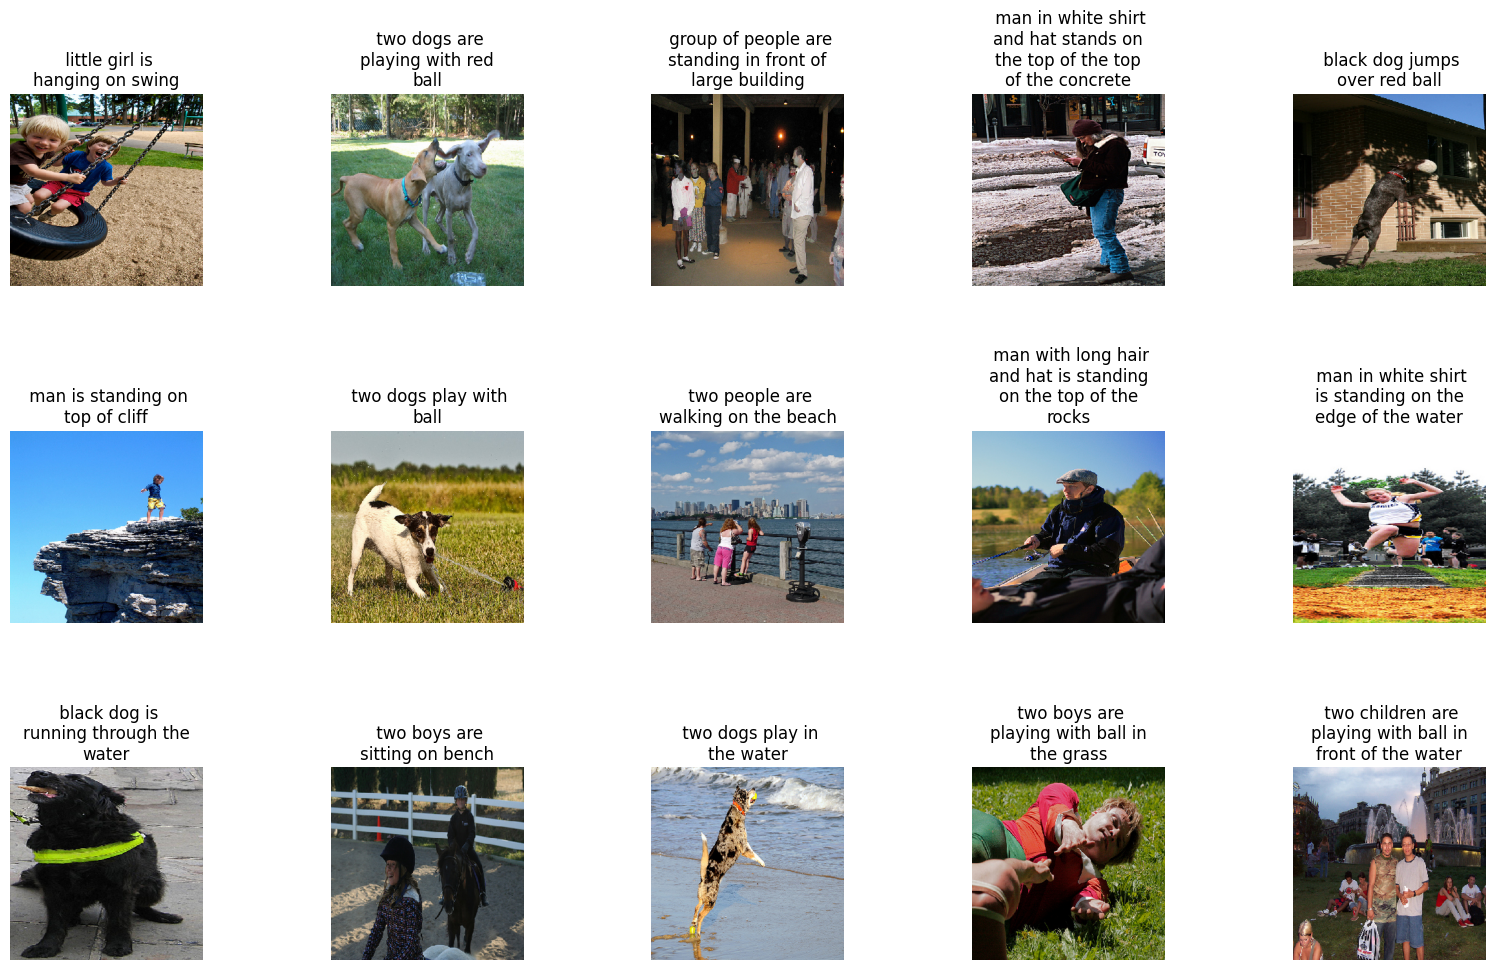

In [ ]:
def greedy_search(model, img, tokenizer, max_length, index_to_word):
    in_text = 'startseq'
    for _ in range(max_length):
        # Convert input sequence to integers using the tokenizer
        sequence = tokenizer.texts_to_sequences([in_text])[0]

        # Pad input sequence
        sequence = pad_sequences([sequence], maxlen=max_length)

        # Predict the next word probabilities
        yhat = model.predict([img, sequence], verbose=0)

        # Get the index of the word with the highest probability
        yhat = np.argmax(yhat)

        # Map the index to the word
        word = index_to_word[yhat]

        # Stop if cannot map the word or if it is an end token
        if word is None or word == 'endseq':
            break

        # Add the predicted word to the input sequence
        in_text += ' ' + word

    return in_text




def read_image(path, img_size=299):
    img = load_img(path, target_size=(img_size, img_size))
    img = img_to_array(img)/255.

    return img


# Invert the word_index to create a dictionary of index to word
index_to_word = {index: word for word, index in word_index.items()}

# Generate a sample of the test image dataset
random_test_images = random.choices(list(encoded_test_images.keys()), k=15)

for id in random_test_images:
    print(id, test_captions[id])

plt.figure(figsize=(20, 20))
i = 0
for id in random_test_images:
    i += 1
    img = encoded_test_images[id].reshape((1,2048))
    caption = greedy_search(model, img, tokenizer, max_length, index_to_word)
    caption = caption.replace('startseq', '')

    plt.subplot(5 , 5, i)
    plt.subplots_adjust(hspace=0.75)
    image = read_image(image_path + id)
    text = textwrap.fill(caption, 20)
    plt.imshow(image)
    plt.title(text)
    plt.axis("off")


Results
As we can clearly see there is some redundant caption generation e.g. Dog running through the water, overusage of blue shirt for any other coloured cloth

The model performance can be further improved by training on more data and using attention mechanism so that our model can focus on relevant areas during the text generation
We can also leverage the interprettability of the attention mechanism to understand which areas of the image leads to the generation of which word

The Bilingual Evaluation Understudy Score, or BLEU for short, is a metric that evaluates the accuracy of a generated sentence compared to a reference sentence.

The approach works by counting matching n-grams in the predicted sentence to n-grams in the reference sentence. The comparison is independent of word order. I shall use the implementation of the BLEU score that is provided in the Natural Language Toolkit library (NLTK).




---

### **5.2 Beam Search**

- Implement a Beam Search algorithm and compare the performance with Greedy Search

In [ ]:
# Beam search code

---

# **6. Performance**

### **6.1 BLEU scores**

- Examine the performance of the model on the test dataset
- Implement the BLEU Score to measure the quality of the model generated captions


In [ ]:
from nltk.translate.bleu_score import corpus_bleu
# Use test dataset for this evaluation
actual, predicted = [], []

for id in tqdm(test_captions):
    # get actual caption
    captions = test_captions[id]
    # predict the caption for image
    img = encoded_test_images[id].reshape((1,2048))
    y_pred = greedy_search(model, img, tokenizer, max_length, index_to_word)
    # split into words
    actual_captions = [caption.split() for caption in captions]
    y_pred = y_pred.split()
    # append to the list
    actual.append(actual_captions)
    predicted.append(y_pred)

# Calculate BLEU scores
print(f'BLEU-1: {corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0))}')
print(f'BLEU-2: {corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0))}')
print(f'BLEU-3: {corpus_bleu(actual, predicted, weights=(0.33, 0.33, 0.33, 0))}')
print(f'BLEU-4: {corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25))}')

# Need to build a dictionary of BLEU scores to record result after every epoch: {'BLEU-1': [epoch1_score, epoch2_score, ...], 'BLEU-2': [...], etc.}
# Save it to pickle.
# Then restore the results and plot


  0%|          | 0/809 [00:00<?, ?it/s]

BLEU-1: 0.5040217487098134
BLEU-2: 0.3124084732204792
BLEU-3: 0.20225130233440372
BLEU-4: 0.12246522420952591


BLEU-1: 0.521526
BLEU-2: 0.297970
BLEU Score is used to evaluate the predicted text against a reference text, in a list of tokens.

The reference text contains all the words appended from the captions data (actual_captions)

A BLEU Score more than 0.4 is considered a good result, for a better score increase the no. of epochs accordingly.

** TEST a model traijned over more epochs - see if BLEU score is better despite loss/accuracy of the validation set being worse


---

### **6.2 Model Improvement**

- Provide options for improving the performance for the model and outline what will be tested in [STAGE 1B: Optimized CNN-RNN Model](https://github.com/mhodierne1402/data-science-ml-portfolio/blob/main/image-caption-generator/Image_Caption_Generator_Stage_1B_Optimized_CNN_RNN_Model.ipynb)

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
def generate_caption(image_name):
    # load the image
    # image_name = "1001773457_577c3a7d70.jpg"
    image_id = image_name.split('.')[0]
    img_path = os.path.join(BASE_DIR, "Images", image_name)
    image = Image.open(img_path)
    captions = mapping[image_id]
    print('---------------------Actual---------------------')
    for caption in captions:
        print(caption)
    # predict the caption
    y_pred = predict_caption(model, features[image_id], tokenizer, max_length)
    print('--------------------Predicted--------------------')
    print(y_pred)
    plt.imshow(image)

generate_caption("1001773457_577c3a7d70.jpg")
generate_caption("1002674143_1b742ab4b8.jpg")


---

# **7. Conclusions**


Comments of improving performance:

Number of epochs - test and compare
compare accuracy on train set anmd test set
be clear anbout how val and test set were used

what hyperparameters can be tuned?

- glove embedding dimensions
- number epochs
- size of vocabuklary - remove infrequent use. words

what measures. of success do I use?

Alternatives to try:
Greedy vs beam
text2Vector? instead of GloVe

Add full documentation and explanation


THINGS TO TEST
- mock up how my results data is going to look
- set up another notebook for improvements - use this for baseline model only
TRY CHNAGING ENCODER SETUP FIRST - reduce vocab, encoders etc - measure metrics after each change. THEN try BEAM search
- Beam Search
- reducing vocab
- increasing GloVe vector size
- using the alternative text2Vector to GloVe (maybe present them the other. way round)
- increased EPOCHs to see if BLEU score is impacted - increase one at a time - run BLUE after each - then map BLEU by Epoch to see correlation with accuracy/loss (remove early stopping)
- try alterative to InceptionV3

End up with a new baseline against which I  can test alternative architectures.

Keep dataset and performance metrics constant throughout.



